In [10]:
import datetime
from functools import lru_cache
import numpy as np
from scipy.stats.mstats import gmean
from scipy.stats import hmean
import matplotlib.pyplot as plt
import yfinance as yf

np.random.seed(1123)

In [20]:
# Monte Carlo Simulation
spx_payoff = np.array([0.85, 1.0, 1.15, 1.30, 1.30])
spx_probs = np.array([11/120, 22/120, 30/120, 37/120, 20/120])
n_trials = 10_000
n_rolls = 25
mc = np.random.choice(spx_payoff, (n_trials, n_rolls), p=spx_probs)

print(f"p50 Geometric Mean: {np.median(gmean(mc, axis=1)):.2f}")

p50 Geometric Mean: 1.16


In [12]:
@lru_cache(maxsize=None)
def get_sp500_yearly_returns(end_year, start_year=1930):
    # Initialize a yfinance session
    yf.pdr_override()

    # Define the ticker symbol for the S&P 500
    symbol = '^GSPC'

    # Initialize a dictionary to store YOY returns for each year
    yearly_returns = {}

    # Loop through each year and calculate YOY returns
    for year in range(start_year, end_year + 1):
        start_date = datetime.datetime(year, 1, 1)
        end_date = datetime.datetime(year + 1, 1, 1) - datetime.timedelta(days=1)

        # Fetch historical data for the S&P 500 for the current year
        sp500 = yf.download(symbol, start=start_date, end=end_date, progress=False)

        # Calculate the YOY return for the current year
        closing_price_start = sp500['Adj Close'].iloc[0]
        closing_price_end = sp500['Adj Close'].iloc[-1]

        year_over_year_return = (closing_price_end - closing_price_start) / closing_price_start * 100

        # Store the YOY return in the dictionary
        yearly_returns[year] = year_over_year_return

    return yearly_returns

In [13]:
yearly_returns = get_sp500_yearly_returns(end_year=2022)
returns = np.array(list(yearly_returns.values()))

In [14]:
bins = [-float('inf'), -15, 0, 15, 30, float('inf')]
spx_probs_calc, _ = np.histogram(returns, bins=bins)
spx_probs_calc = spx_probs_calc / len(returns)

assert np.sum(spx_probs_calc) == 1.0

In [15]:
print(f"max yearly returns:{np.max(returns):.2f}, min yearly returns {np.min(returns):.2f}")

max yearly returns:45.97, min yearly returns -48.90


In [16]:
spx_payoff_calc = np.array([0.52, 1.0, 1.15, 1.30, 1.45])
n_trials = 10_000
n_rolls = 25
mc_spx_calc = np.random.choice(spx_payoff_calc, (n_trials, n_rolls), p=spx_probs_calc)

print(f"p1 Geometric Mean: {np.percentile(gmean(mc_spx_calc, axis=1), 1):.2f}")
print(f"p5 Geometric Mean: {np.percentile(gmean(mc_spx_calc, axis=1), 5):.2f}")
print(f"p50 Geometric Mean: {np.percentile(gmean(mc_spx_calc, axis=1), 50):.2f}")
print(f"p95 Geometric Mean: {np.percentile(gmean(mc_spx_calc, axis=1), 95):.2f}")
print(f"p99 Geometric Mean: {np.percentile(gmean(mc_spx_calc, axis=1), 99):.2f}")

p1 Geometric Mean: 0.94
p5 Geometric Mean: 0.98
p50 Geometric Mean: 1.08
p95 Geometric Mean: 1.17
p99 Geometric Mean: 1.20


[]

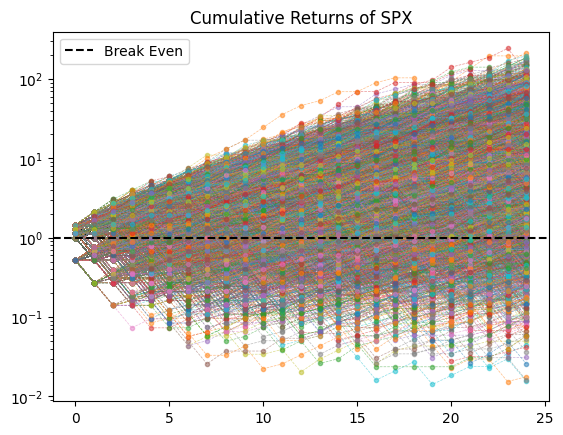

In [17]:
a = np.cumprod(mc_spx_calc, axis=1)
fig, ax = plt.subplots()
ax.plot(np.arange(n_rolls), a.T, alpha=0.5, linewidth=0.5, marker = '.', linestyle='--')
ax.set_title("Cumulative Returns of SPX")
plt.axhline(y=1, color='black', linestyle='--', label='Break Even')
ax.set_yscale('log')
ax.legend()
ax.plot()